In [1]:
import pandas as pd
import numpy as np

import matplotlib as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('to_train.csv')
sospechoso = 'george'

In [3]:
df['name'] = np.where(df['name'] == f'{sospechoso}', 1, 0)

In [4]:
log_reg = LogisticRegression(max_iter=1000)

In [5]:
X = df.drop(columns = 'name')
y = df['name']

In [6]:
X.shape

(3000, 20)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [8]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
log_reg.score(X_test, y_test)

0.9983333333333333

In [10]:
log_reg 

LogisticRegression(max_iter=1000)

In [12]:
y_pred = log_reg.predict(X_test)

In [15]:
log_reg.score(X_test, y_test)

0.9983333333333333

In [18]:
len(y_pred)

600

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[514   0]
 [  1  85]]


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       514
           1       1.00      0.99      0.99        86

    accuracy                           1.00       600
   macro avg       1.00      0.99      1.00       600
weighted avg       1.00      1.00      1.00       600



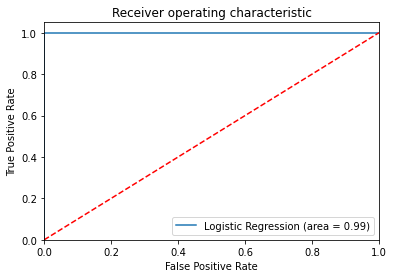

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()